# DBSCAN

In [4]:
import numpy as np
from sklearn.cluster import DBSCAN

In [10]:
np.random.seed(1)
r_data = np.random.randn(50000, 2) * 20 + 20

In [9]:
dbs = DBSCAN(min_samples=2, eps=3)
clusters = dbs.fit_predict(r_data)
# Los puntos anomalos tienen la etiqueta -1
list(clusters).count(-1)

94

De esos 50000 cuales: 

- $-1$ : datos anomalos

In [11]:
import pandas as pd
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from collections import Counter

In [12]:
rcParams['figure.figsize'] = (5, 4)

In [13]:
df = pd.read_csv("https://bit.ly/3arouNg")
df.shape

(6463, 13)

In [16]:
df.head()

,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
data = df.iloc[:,1:3]
data.head()

,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30
2,8.1,0.28
3,7.2,0.23
4,7.2,0.23


Combinacion con analisis de componentes principales y despues de usar DBSCAN

In [17]:
dbs = DBSCAN(eps=0.2, min_samples=20).fit(data)
print(dbs)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)


In [20]:
print(Counter(dbs.labels_))
outliers = pd.DataFrame(data)
print(outliers[dbs.labels_ == -1])

Counter({0: 6281, -1: 117, 1: 40, 2: 25})
      fixed acidity  volatile acidity
1502           14.2             0.270
1927            9.9             1.005
2130            9.8             0.930
2297            4.6             0.445
2601            4.5             0.190
...             ...               ...
6131            6.3             1.020
6169            7.6             1.580
6182            8.0             1.180
6409           11.1             0.440
6414           11.2             0.400

[117 rows x 2 columns]


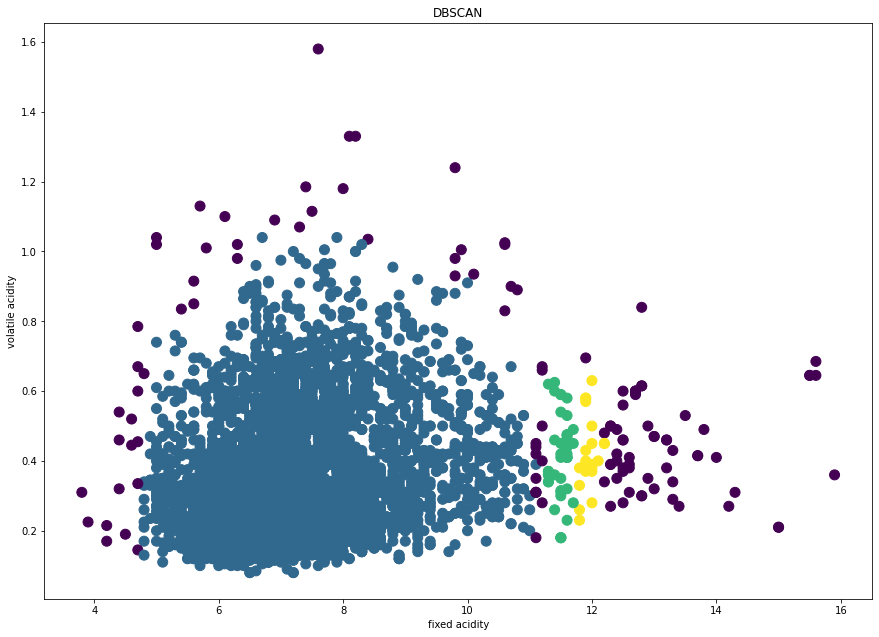

In [21]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 2.3, 2])
colors = dbs.labels_

ax.scatter(data.iloc[:,0].values, data.iloc[:,1].values, c=colors, s=100)
ax.set_xlabel('fixed acidity')
ax.set_ylabel('volatile acidity')
plt.title('DBSCAN')
plt.show()
